# Usage examples

## Imports

In [1]:
import numpy as np
import sympy as sp

### axisangle_rotation.py

In [2]:
from axisangle_rotation import *

# Unit vector
r = (np.sqrt(2)/2)*np.array([0, -1, 1])

# Rotation angle
theta = np.pi/6

# Rotation matrix
R = axisangle_rotation(r=r, theta=theta)
print(R)

[[ 0.8660254  -0.35355339  0.35355339]
 [ 0.35355339  0.9330127  -0.0669873 ]
 [ 0.35355339 -0.0669873   0.9330127 ]]


### compute_jacobian.py

Displays the Jacobian matrix. Example with the 2R planar robot arm:

In [3]:
from compute_jacobian import compute_jacobian

theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

# 2R Forward Kinematics
x = l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)
y = l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)

functions = [x, y]
variables = [theta1, theta2]

J = compute_jacobian(functions, variables)

sp.pprint(J)

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦


### determinant.py

In [4]:
from determinant import determinant

theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

M = sp.Matrix([[l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)],
               [l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)],
               ])

J = compute_jacobian(M, variables=[theta1, theta2])

det_J = determinant(J)

==== Determinant of the matrix ====
l₁⋅l₂⋅sin(θ₂)


### DH_matrix.py

Displays the Denavit-Hartenberg transformation matrix

In [5]:
from DH_matrix import DH_matrix

DH_mat = DH_matrix()
sp.pprint(DH_mat)

⎡cos(θ)  -sin(θ)⋅cos(α)  -sin(α)⋅sin(θ)  a⋅cos(θ)⎤
⎢                                                ⎥
⎢sin(θ)  cos(α)⋅cos(θ)   -sin(α)⋅cos(θ)  a⋅sin(θ)⎥
⎢                                                ⎥
⎢  0         sin(α)          cos(α)         d    ⎥
⎢                                                ⎥
⎣  0           0               0            1    ⎦


### euler_rotation.py

In [6]:
from euler_rotation import euler_rotation


angles = [np.pi/2, np.pi/4, -np.pi/4]

R = euler_rotation(sequence='xyz', angles=angles)

print(R)

[[ 5.00000000e-01  5.00000000e-01  7.07106781e-01]
 [ 5.00000000e-01  5.00000000e-01 -7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01  4.32978028e-17]]


### find_null.py

In [7]:
from find_null import find_null

J = sp.Matrix([[-1, 0, 1],
               [0, 0, 0],
               ])

find_null(J)

Nullspace of the matrix:
Basis vector n°1:
⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦
Basis vector n°2:
⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦


### find_range.py

In [8]:
from find_range import find_range

J = sp.Matrix([[-1, 0, 1],
               [0, 0, 0],
               ])

find_range(J)

Warning! This result might be wrong, please check by hand if possible.
Range of the Jacobian:
Basis vector n°1:
⎡-1⎤
⎢  ⎥
⎣0 ⎦


### gradient_IK_2R_planar.py

In [9]:
from gradient_IK_2R_planar import gradient_IK_2R_planar

l = [0.5, 0.4]   # [m]
pd = [0.4, -0.3] # [m]

q0_1 = np.multiply([-70, -100], np.pi/180)

q1, e1, q1_lst, e1_lst = gradient_IK_2R_planar(pd, q0_1, l, 
                                               kmax=66, alpha=1, verbose=0)

### jacobian_analysis.py

In [10]:
from compute_jacobian import compute_jacobian
from jacobian_analysis import jacobian_analysis

theta1, theta2, l1, l2 = sp.symbols('theta1 theta2 l1 l2')

# 2R Forward Kinematics
x = l1 * sp.cos(theta1) + l2 * sp.cos(theta1 + theta2)
y = l1 * sp.sin(theta1) + l2 * sp.sin(theta1 + theta2)

functions = [x, y]
variables = [theta1, theta2]

J = compute_jacobian(functions, variables)
jacobian_analysis(J, variables)

==== Jacobian Analysis ====
⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦
Shape of the Jacobian is 2x2
The Jacobian is square
==== Determinant of the matrix ====
l₁⋅l₂⋅sin(θ₂)

==== Singularity conditions ====
[(θ₁, 0), (θ₁, π)]

==== Rank of the Jacobian ====
Rank: 2

==== Range of the Jacobian ====
Warning! This result might be wrong, please check by hand if possible.
Range of the Jacobian:
Basis vector n°1:
⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)⎤
⎢                             ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂) ⎦
Basis vector n°2:
⎡-l₂⋅sin(θ₁ + θ₂)⎤
⎢                ⎥
⎣l₂⋅cos(θ₁ + θ₂) ⎦

==== Nullspace of the Jacobian ====
Nullspace of the matrix:
The nullspace is trivial (only the zero vector).

==== Complementary nullspace of the Jacobian ====
The complementary nullspace is only the 0 vector


### newton_IK_2R_planar.py

In [11]:
from newton_IK_2R_planar import newton_IK_2R_planar

l = [0.5, 0.4]   # [m]
pd = [0.4, -0.3] # [m]

# Elbow up (in radians)
q0_1 = np.multiply([20, -120], np.pi/180)

q1, e1, q1_lst, e1_lst = newton_IK_2R_planar(pd, q0_1, l, verbose=1)

===== Iteration n°1 =====
(q0, q1) = [ 0.1735905  -1.99607972]
Error norm: 0.07708794207802562
===== Iteration n°2 =====
(q0, q1) = [ 0.17969511 -1.98241324]
Error norm: 0.00720704119497683
===== Iteration n°3 =====
Converegence reached in 3 steps
Computed joint angles for target position [0.4, -0.3]: (q0, q1) = [ 0.17969511 -1.98241324]
Final error norm: 7.485780373751599e-05


In [12]:
# Elbow down (in radians)
q0_2 = np.multiply([-70, 100], np.pi/180) 

q2, e2, q2_lst, e2_lst = newton_IK_2R_planar(pd, q0_2, l, kmax=4, verbose=1)

===== Iteration n°1 =====
(q0, q1) = [-1.45886458  2.01248161]
Error norm: 0.12123017840524487
===== Iteration n°2 =====
(q0, q1) = [-1.46715424  1.98264386]
Error norm: 0.013990331230679004
===== Iteration n°3 =====
(q0, q1) = [-1.46653475  1.98231337]
Error norm: 0.00028396842651794315
===== Iteration n°4 =====
Converegence reached in 4 steps
Computed joint angles for target position [0.4, -0.3]: (q0, q1) = [-1.46653475  1.98231337]
Final error norm: 9.055974332927428e-08


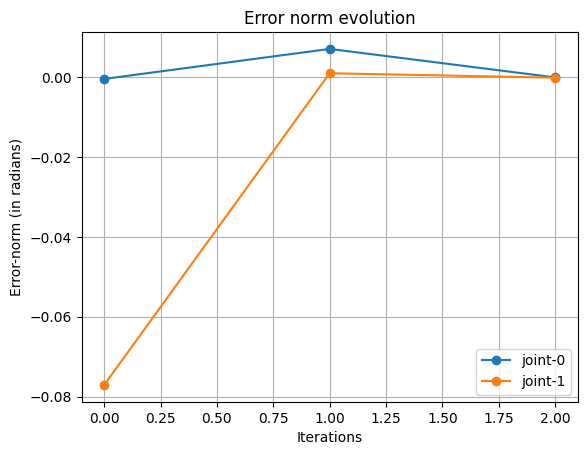

In [13]:
from plotter import plotter
from newton_IK_2R_planar import newton_IK_2R_planar

l = [0.5, 0.4]   
pd = [0.4, -0.3] 

q0 = np.multiply([20, -120], np.pi/180)

q, e, q_lst, e_lst = newton_IK_2R_planar(pd, q0, l, verbose=0)

e_lst = np.array(e_lst) # The conversion is necessary to use slicing

X = range(len(e_lst))
plotter(X, [e_lst[:,0], e_lst[:,1]], "o",
        labels=["joint-0","joint-1"],
        title="Error norm evolution",
        xlabel="Iterations",
        ylabel="Error-norm (in radians)")

### transform_matrix.py

In [14]:
from transform_matrix import transform_matrix

DH_table = [[0, 0.5, 1, sp.pi/4],
            [-sp.pi/2, 0.3, 0.2, sp.pi/6],
            [0, 0.2, 0.4, sp.pi/3],]

T = transform_matrix(DH_table=DH_table, x=0, y=2)
sp.pprint(T)

⎡     -√3            ⎤
⎢1/2  ────  0   0.1  ⎥
⎢      2             ⎥
⎢                    ⎥
⎢√3                  ⎥
⎢──   1/2   0  0.1⋅√3⎥
⎢2                   ⎥
⎢                    ⎥
⎢ 0    0    1   0.4  ⎥
⎢                    ⎥
⎣ 0    0    0    1   ⎦


The numerical result can be obtained with evalf()

In [ ]:
T_numerical = T.evalf()
sp.pprint(T_numerical)

⎡       0.5         -0.866025403784439   0          0.1       ⎤
⎢                                                             ⎥
⎢0.866025403784439         0.5           0   0.173205080756888⎥
⎢                                                             ⎥
⎢        0                  0           1.0         0.4       ⎥
⎢                                                             ⎥
⎣        0                  0            0          1.0       ⎦
